### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

##### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
train = pd.read_csv('train.csv')

print('Size of training set : {} rows and {} columns'.format(*train.shape))

Size of training set : 4209 rows and 378 columns


In [3]:
test = pd.read_csv('test.csv')

print('Size of training set : {} rows and {} columns'.format(*test.shape))

Size of training set : 4209 rows and 377 columns


In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


We can see that the columns/features have been anonymized.

We can also see another column which is ID. ID might be significant.

The target variable is the time taken in seconds.

## Checking distribution of labels

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168


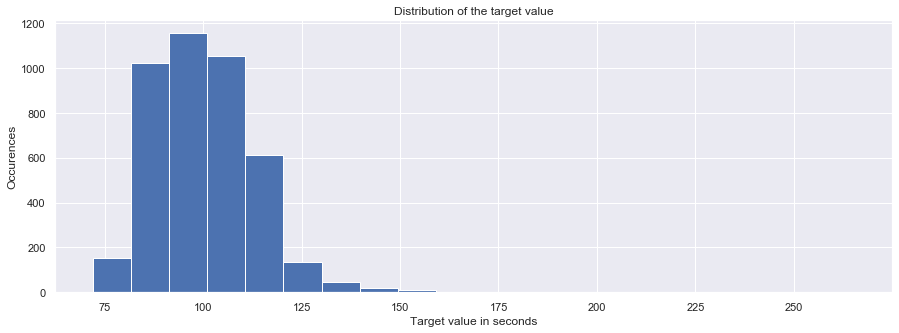

In [5]:
y_train = train['y'].values
plt.figure(figsize=(15,5))
plt.hist(y_train,bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train),max(y_train),y_train.mean(),y_train.std()))

In [6]:
print('Count of values above 180: {}'.format(np.sum(y_train>180)))

Count of values above 180: 1


In [8]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* So we have a pretty standard distribution of target variables which is centered around 100

* Nothing special to nore here, except that there is a single outlier at ~265 seconds and every other value is below 180.

* ID is not sequenced because the whole dataset is randomly sampled into train and test sets.

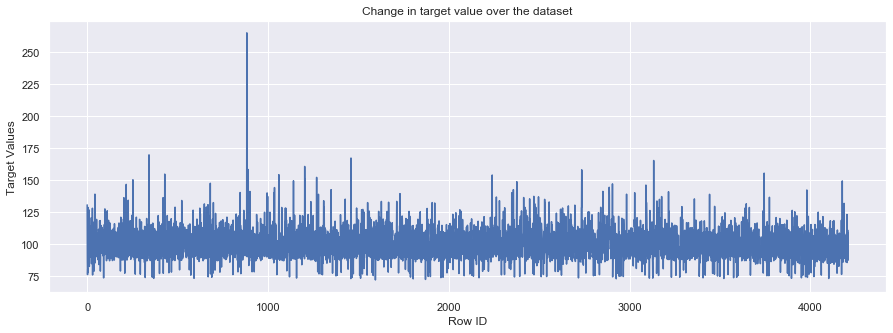

In [9]:
plt.figure(figsize=(15,5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target Values')
plt.title('Change in target value over the dataset')
plt.show()

### Checking for seasonality

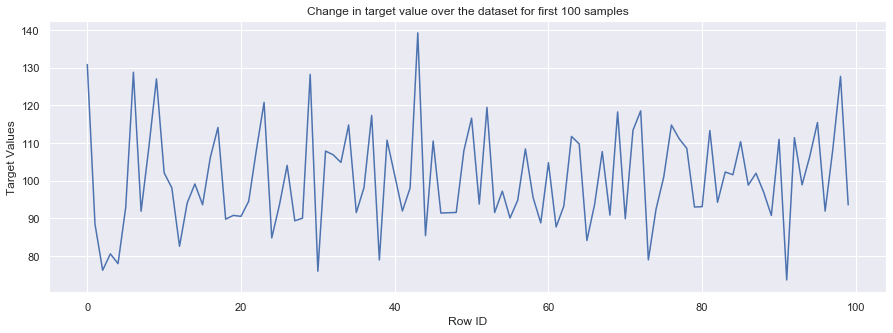

In [11]:
plt.figure(figsize=(15,5))
plt.plot(y_train[:100])
plt.xlabel('Row ID')
plt.ylabel('Target Values')
plt.title('Change in target value over the dataset for first 100 samples')
plt.show()

* Data is pretty much stationary i.e. no trending in the data.

* There is no specific pattern in the training data as well.


##### So we can conclude that data is not a time series since there is no trend and no pattern / seasonality.

## Feature Analysis

In [12]:
cols = [c for c in train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature Types:')
train[cols].dtypes.value_counts()

Number of features: 376
Feature Types:


int64     368
object      8
dtype: int64

## Find Cardinality

1. Create a list of 3 lists. Call it counts.


2. Iterate through all columns in the cols. i.e. all our independent variables


3. In the iterator, do the following:

    a. Find the type of all the columns.
    
    b. Find the # of unique values in each of these columns.
    
    c. If unique value = 1, assign it in the counts[0], if unique value is 2 then assign to counts[1] else assign it to counts[2].

In [13]:
counts = [[],[],[]]

for c in cols:
    typ = train[c].dtype
    
    uniq = len(np.unique(train[c]))
    
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

In [14]:
print('Constant Features: {}  Binary Features: {}  Categorical Features: {}\n'.format(*[len(c) for c in counts]))

Constant Features: 12  Binary Features: 356  Categorical Features: 8



In [16]:
print('Constant Features: ',counts[0])
print('\nCategorical Features: ',counts[2])

Constant Features:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Categorical Features:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


We've 12 features which have only a single value in them. These are pretty useless for supervised algorithms, and should probably be dropped.

    Exception: We might need to check the test dataset just in case a different value appears in the test set

Rest of our dataset is made up of binary features, and a few categorical features.

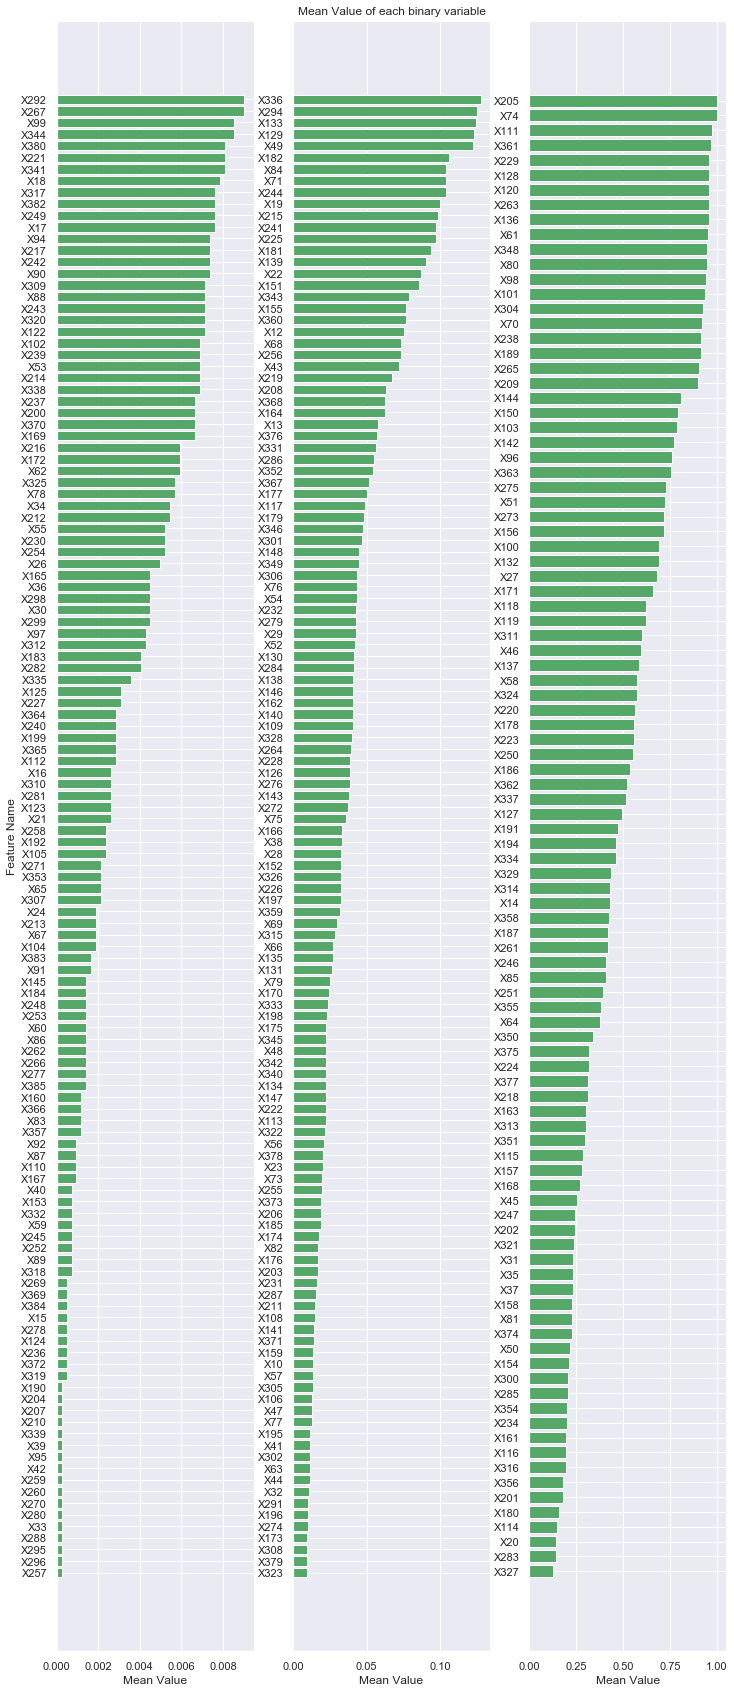

In [21]:
pal = sns.color_palette()

binary_means = [np.mean(train[c]) for c in counts[1]]

binary_names = np.array(counts[1])[np.argsort(binary_means)]

binary_means = np.sort(binary_means)


fig, ax = plt.subplots(1,3,figsize=(12,30))

ax[0].set_ylabel('Feature Name')
ax[1].set_title('Mean Value of each binary variable')

for i in range(3):
    names, means = binary_names[i*128:(i+1)*128], binary_means[i*128:(i+1)*128]
    ax[i].barh(range(len(means)),means,color=pal[2])
    ax[i].set_xlabel('Mean Value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names,rotation='horizontal')
    
plt.show()

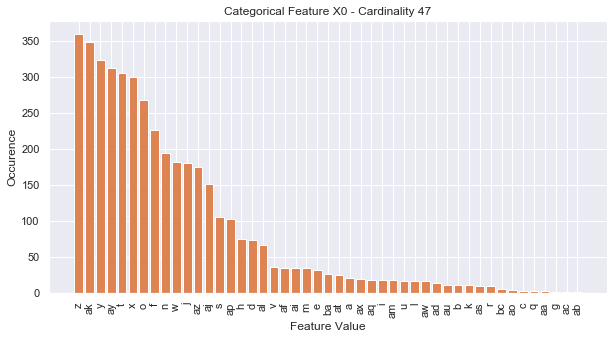

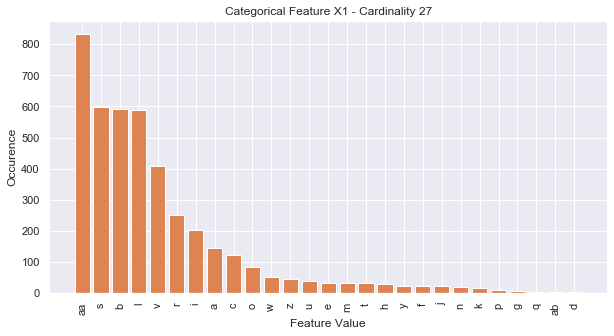

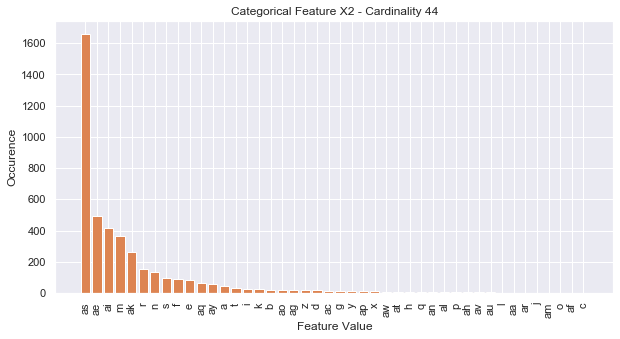

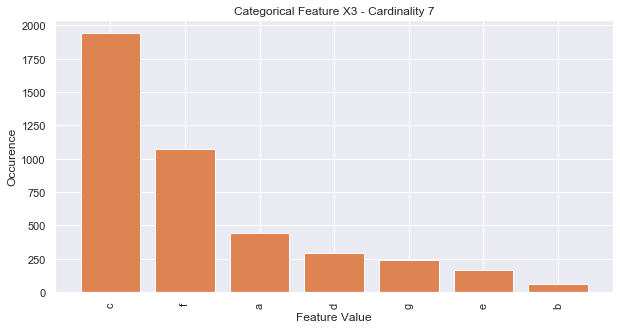

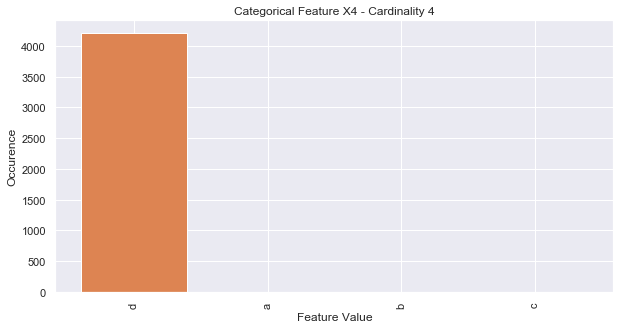

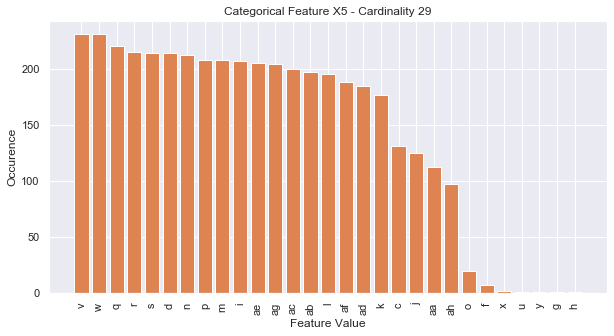

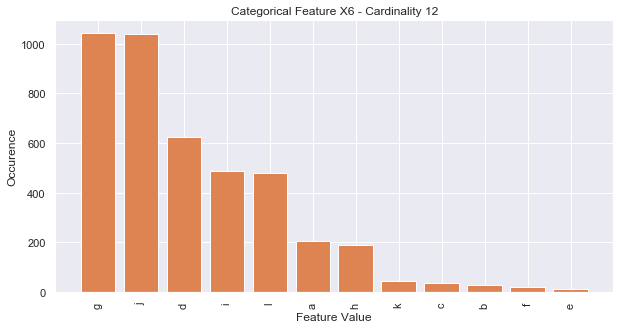

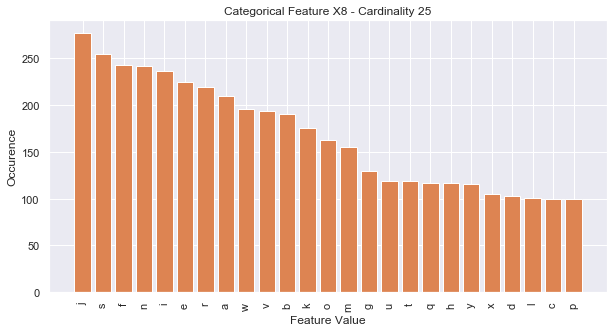

In [23]:
for c in counts[2]:
    value_counts = train[c].value_counts()
    fig,ax = plt.subplots(figsize=(10,5))
    plt.title('Categorical Feature {} - Cardinality {}'.format(c, len(np.unique(train[c]))))
    plt.xlabel('Feature Value')
    plt.ylabel('Occurence')
    plt.bar(range(len(value_counts)),value_counts.values,color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')

    plt.show()

## XGBoost

In [27]:
usable_cols = list(set(train.columns)-set(['ID','y']))

y_train = train['y'].values
id_test = test['ID'].values

x_train = train[usable_cols]
x_test = test[usable_cols]

for column in usable_cols:
    cardinality = len(np.unique(x_train[column]))
    
    if cardinality == 1:
        x_train.drop(column,axis=1)
        x_test.drop(column,axis=1)
    if cardinality > 2:  # counts[2]
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train[['X0','X1','X2','X3','X4','X5','X6','X8']].head()

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110


In [29]:
ord('x')

120

In [31]:
x_train[cols].dtypes.value_counts()

int64    376
dtype: int64

In [32]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2score(preds,dtrain):
    labels = dtrain.get_label()
    return 'r2',r2_score(labels,preds)

watchlist = [(d_train,'train'),(d_valid,'valid')]

clf = xgb.train(params,d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2score,maximize=True,verbose_eval=10)

[10:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.9886	valid-rmse:98.8798	train-r2:-59.4871	valid-r2:-61.8155
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.0528	valid-rmse:80.9815	train-r2:-39.5535	valid-r2:-41.133
[20]	train-rmse:66.426	valid-rmse:66.3805	train-r2:-26.2375	valid-r2:-27.3095
[30]	train-rmse:54.5106	valid-rmse:54.4806	train-r2:-17.3423	valid-r2:-18.0693
[40]	train-rmse:44.8194	valid-rmse:44.7955	train-r2:-11.4001	valid-r2:-11.892
[50]	train-rmse:36.9556	valid-rmse:36.9296	train-r2:-7.4305	valid-r2:-7.76196
[60]	train-rmse:30.5948	valid-rmse:30.5629	train-r2:-4.77815	valid-r2:-5.00123
[70]	train-rmse:25.4735	valid-rmse:25.4291	train-r2:-3.00563	valid-r2:-3.15445
[80]	train-rmse:21.3766	valid-rmse:21.3191	train-r2:-1.82079	valid-r2:-1.92003
[90]	train-rmse:18.1256	valid-rmse:18

In [34]:
print(clf.feature_names)

['X181', 'X66', 'X58', 'X166', 'X134', 'X224', 'X305', 'X118', 'X75', 'X344', 'X307', 'X152', 'X366', 'X374', 'X293', 'X56', 'X139', 'X167', 'X378', 'X320', 'X142', 'X172', 'X319', 'X328', 'X111', 'X216', 'X21', 'X29', 'X123', 'X78', 'X86', 'X191', 'X106', 'X354', 'X370', 'X347', 'X54', 'X294', 'X255', 'X377', 'X323', 'X140', 'X144', 'X0', 'X243', 'X274', 'X125', 'X288', 'X82', 'X170', 'X349', 'X20', 'X112', 'X43', 'X285', 'X362', 'X309', 'X100', 'X369', 'X259', 'X273', 'X130', 'X275', 'X14', 'X16', 'X313', 'X226', 'X155', 'X77', 'X160', 'X92', 'X365', 'X260', 'X103', 'X39', 'X215', 'X169', 'X119', 'X71', 'X192', 'X136', 'X122', 'X254', 'X300', 'X26', 'X97', 'X133', 'X197', 'X6', 'X263', 'X223', 'X375', 'X281', 'X341', 'X30', 'X94', 'X35', 'X48', 'X85', 'X290', 'X282', 'X244', 'X61', 'X79', 'X12', 'X295', 'X350', 'X360', 'X74', 'X356', 'X175', 'X83', 'X173', 'X31', 'X283', 'X15', 'X165', 'X225', 'X156', 'X126', 'X201', 'X98', 'X284', 'X183', 'X338', 'X70', 'X227', 'X238', 'X159', 'X211

#### Importance Types



* "weight" : the number of times a feature is used to split the data across all the tree


* "gain" : average gain across all splits the feature is used in


* "total_gain" : total gain across all splits the feature is used in


* "cover" : average coverage across all splits the feature is used in


* "total_cover" : total coverage across all splits the feature is used in

In [35]:
clf.get_score(importance_type='gain')

{'X314': 36586.38139033334,
 'X29': 10612.829471593748,
 'X127': 8815.688665202273,
 'X118': 4090.861788698693,
 'X315': 3463.418232056478,
 'X189': 2880.094140625,
 'X47': 351.9407116897259,
 'X134': 102.3984375,
 'X52': 223.20865377777778,
 'X1': 195.33522422120873,
 'X115': 434.70999461206895,
 'X61': 111.45589191666666,
 'X0': 327.0329691299229,
 'X152': 303.87825463728814,
 'X368': 180.92285158333334,
 'X285': 84.3222656375,
 'X8': 174.60457080172424,
 'X151': 158.42871187419354,
 'X71': 290.74014560606065,
 'X5': 320.02614387180705,
 'X283': 218.35919187000005,
 'X218': 70.71966402000001,
 'X374': 211.46039168794118,
 'X350': 37.26894854555556,
 'X370': 10.375,
 'X43': 66.78125,
 'X3': 206.35037387352938,
 'X6': 172.99728864327273,
 'X38': 41.28125,
 'X2': 281.51796563499994,
 'X375': 134.5078125,
 'X261': 1498.591186772973,
 'X340': 227.79923340000005,
 'X267': 115.22197316842109,
 'X148': 178.18190316,
 'X54': 402.57148440000003,
 'X302': 87.36458333333333,
 'X175': 84.1054688,

In [37]:
clf.get_score(importance_type='weight')

{'X314': 126,
 'X29': 64,
 'X127': 44,
 'X118': 114,
 'X315': 88,
 'X189': 40,
 'X47': 146,
 'X134': 8,
 'X52': 18,
 'X1': 91,
 'X115': 29,
 'X61': 12,
 'X0': 87,
 'X152': 59,
 'X368': 12,
 'X285': 8,
 'X8': 116,
 'X151': 31,
 'X71': 33,
 'X5': 347,
 'X283': 10,
 'X218': 5,
 'X374': 34,
 'X350': 27,
 'X370': 1,
 'X43': 1,
 'X3': 34,
 'X6': 77,
 'X38': 1,
 'X2': 20,
 'X375': 2,
 'X261': 37,
 'X340': 25,
 'X267': 19,
 'X148': 10,
 'X54': 5,
 'X302': 3,
 'X175': 1,
 'X339': 130,
 'X246': 6,
 'X383': 65,
 'X191': 12,
 'X27': 13,
 'X338': 2,
 'X142': 12,
 'X103': 7,
 'X202': 2,
 'X141': 1,
 'X219': 2,
 'X345': 43,
 'X275': 23,
 'X105': 14,
 'X223': 1,
 'X70': 15,
 'X116': 30,
 'X163': 30,
 'X354': 13,
 'X104': 48,
 'X329': 3,
 'X64': 4,
 'X341': 21,
 'X351': 37,
 'X355': 3,
 'X14': 4,
 'X58': 45,
 'X305': 10,
 'X56': 10,
 'X65': 19,
 'X348': 4,
 'X13': 22,
 'X114': 5,
 'X156': 3,
 'X306': 18,
 'X316': 35,
 'X172': 9,
 'X327': 29,
 'X220': 6,
 'X12': 27,
 'X132': 5,
 'X140': 7,
 'X168': 4,
 

# Predictions

In [38]:
p_test = clf.predict(d_test)

pred = pd.DataFrame()

pred['ID'] = id_test
pred['y'] = p_test

In [39]:
pred.head()

,ID,y
0,1,89.111298
1,2,105.027145
2,3,89.686111
3,4,76.513557
4,5,111.162537
